In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
from tensorflow.keras.datasets import mnist

In [133]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

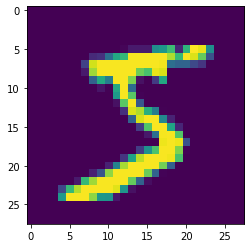

In [134]:
plt.imshow(x_train[0])

In [135]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [136]:
x_train=x_train[y_train==0]
#for smaller data set ,we take only the 0 s from the dataset 

In [137]:
#phase 1-generating
#phase 2-discriminating

In [138]:

tf.random.set_seed(42)
noice_size=100

In [139]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape

In [140]:
28*28

784

In [141]:
#GAN consist of two parts discriminator and generator
#discriminator classifies whether fake or not..tkae input from generator
Discriminator=Sequential()
Discriminator.add(Flatten(input_shape=(28,28)))
Discriminator.add(Dense(150,activation='relu'))
Discriminator.add(Dense(100,activation='relu'))
Discriminator.add(Dense(1,activation='sigmoid'))

Discriminator.compile(loss='binary_crossentropy',optimizer='adam')


In [142]:
#generator fake images from the noise and gives to discriminator
#generator is more likely to decoder part from autoencoder...100->150->750
generator=Sequential()
generator.add(Dense(100,activation='relu',input_shape=[noice_size]))
generator.add(Dense(150,activation='relu'))
generator.add(Dense(784,activation='relu'))
generator.add(Reshape([28,28]))
#reason we are not compiling it becoz it is only trained through the GAN model

In [143]:
GAN=Sequential([generator,Discriminator])

In [144]:
Discriminator.trainable=False
#we should not train the discrimanator in the second phase..so

In [145]:
GAN.compile(loss='binary_crossentropy',optimizer='adam')
#as a whole it is a classifier at the end as discriminator is its final part

In [146]:
import tensorflow as tf

In [147]:
zeros_data=x_train
dataset=tf.data.Dataset.from_tensor_slices(zeros_data)

In [148]:
batch_size=32

In [149]:
dataset=dataset.batch(batch_size,drop_remainder=True)

In [150]:
len(zeros_data)/32

185.09375

In [151]:
GAN.layers[0]

In [152]:
GAN.layers[1]

In [153]:
generator,discriminator=GAN.layers

In [154]:
generator.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_22 (Dense)             (None, 150)               15150     
_________________________________________________________________
dense_23 (Dense)             (None, 784)               118384    
_________________________________________________________________
reshape_3 (Reshape)          (None, 28, 28)            0         
Total params: 143,634
Trainable params: 143,634
Non-trainable params: 0
_________________________________________________________________


In [155]:
epochs=1
#epochs is one becoz after one epoch it can give us the result

In [156]:
for epoch in range(epochs):
    i=0
    for n_batch in dataset:
        i=i+1
        if(i%100==0):
            print(f'current vatc is {i} out of {len(zeros_data)//batch_size}')
        
        noice=tf.random.normal(shape=[batch_size,noice_size]) #100(noice size) random no of each i in batchsize(32)
        
        gen_noice=generator(noice)
        
        fake_vs_real=tf.concat([gen_noice,tf.dtypes.cast(n_batch,tf.float32)],axis=0)#we need to cast the image data into float32 in order to concat
        
        y1=tf.constant([[0.0]]*32 +[[1.0]]*32)#since we concat noise first and real image next
        
        discriminator.trainable=True
        
        discriminator.train_on_batch(fake_vs_real,y1)
        
        
        noice=tf.random.normal([batch_size,noice_size])
        y2=tf.constant([[1.0]]*32)
        discriminator.trainable=False
        GAN.train_on_batch(noice,y2)
        

current vatc is 100 out of 185


In [157]:
noice=tf.random.normal([10,noice_size])

In [158]:
images=generator(noice)

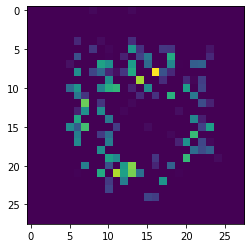

In [160]:
plt.imshow(images[0])